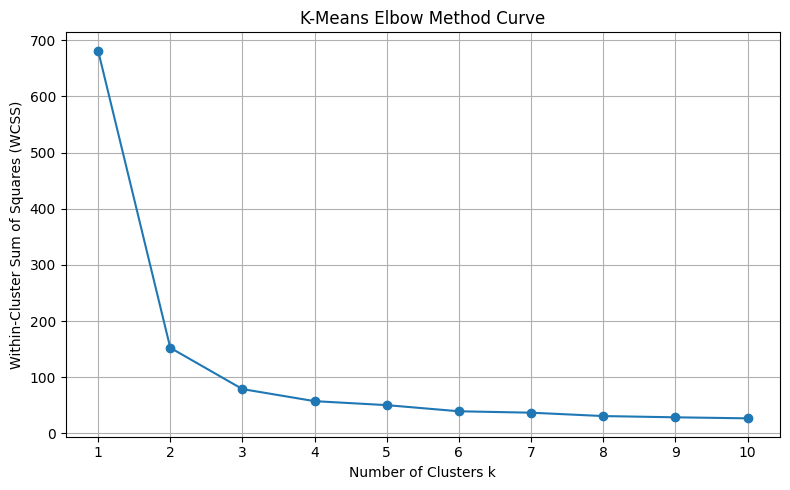

First 5 rows of the dataset with cluster assignments:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species cluster  
0  setosa       1  
1  setosa       1  
2  setosa       1  
3  setosa       1  
4  setosa       1  


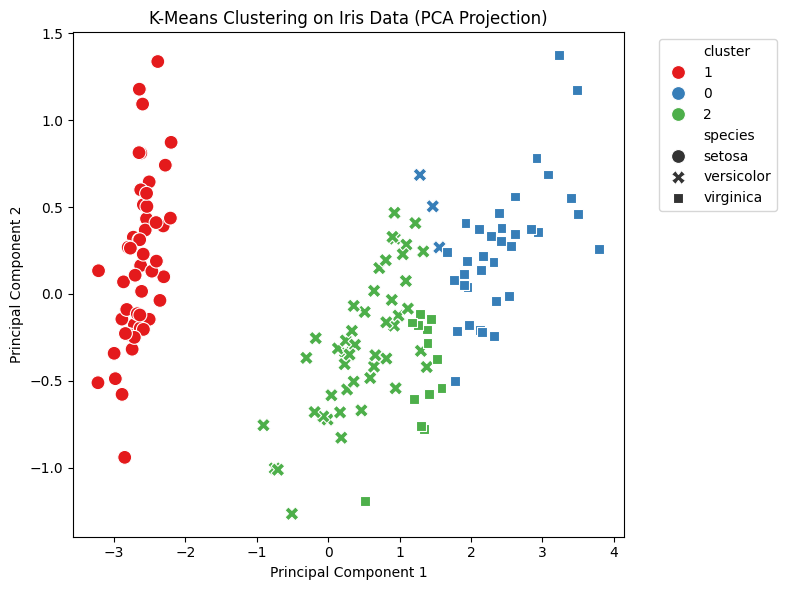

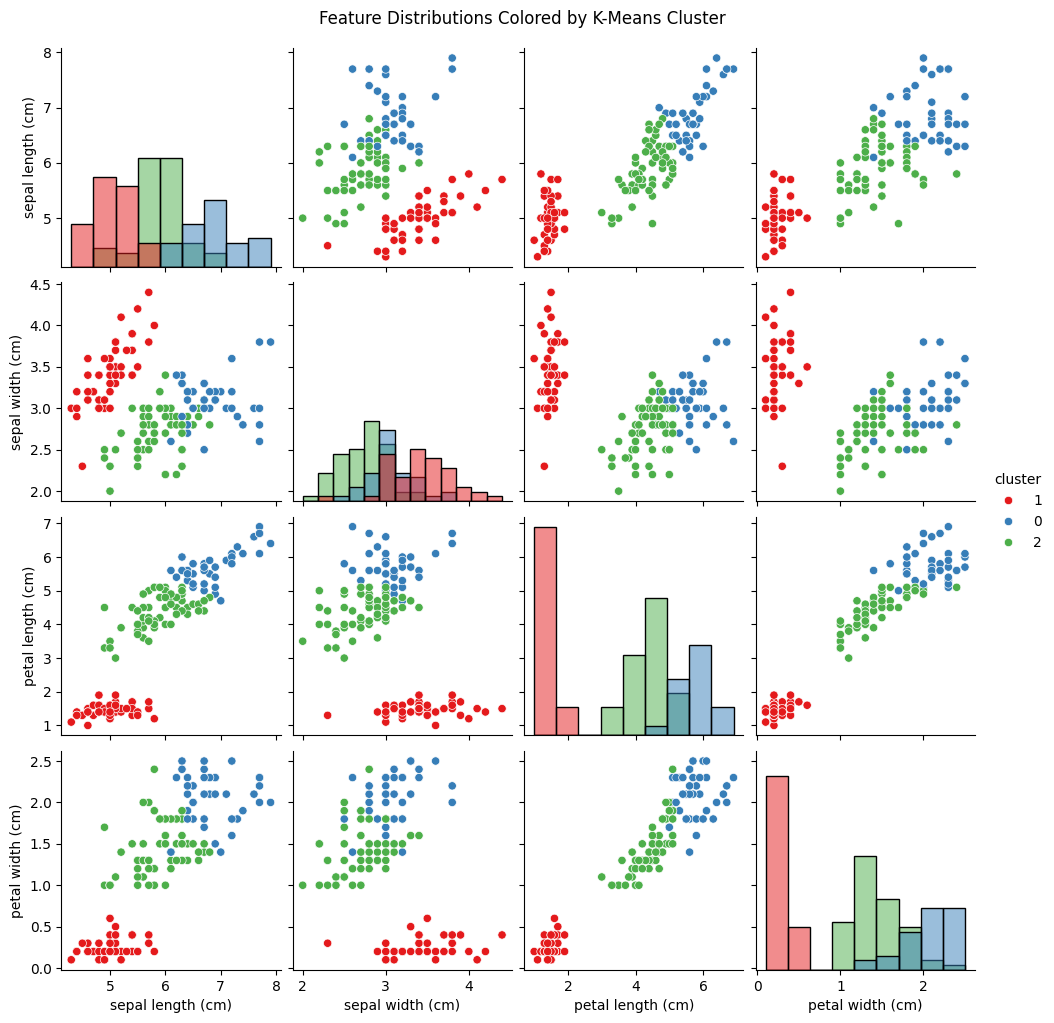

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------------
# 1. Load the Iris dataset
# -------------------------
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species_numeric'])

# Convert numeric labels to species names
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species_numeric'].apply(converter)
iris_df = pd.concat([iris_df, target_df['species']], axis=1)

# -----------------------------
# 2. Extract numeric features
# -----------------------------
X = iris_df[iris.feature_names]

# -------------------------------------
# 3. Elbow Method: WCSS vs. number of clusters
# -------------------------------------
wcss = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=101)
    km.fit(X)
    wcss.append(km.inertia_)  # inertia_ is the WCSS

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.title('K-Means Elbow Method Curve')
plt.xlabel('Number of Clusters k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Apply K-Means clustering with k=3
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=101)
kmeans.fit(X)
clusters = kmeans.labels_
iris_df['cluster'] = clusters.astype(str)

print("First 5 rows of the dataset with cluster assignments:")
print(iris_df.head())

# -----------------------------------
# 5. Visualize clusters via PCA (2D projection)
# -----------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters.astype(str)
pca_df['species'] = iris_df['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='cluster',
    style='species',
    palette='Set1',
    s=100
)
plt.title('K-Means Clustering on Iris Data (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# -----------------------------------
# 6. PairPlot of feature distributions colored by cluster
# -----------------------------------
sns.pairplot(
    iris_df,
    vars=iris.feature_names,
    hue='cluster',
    palette='Set1',
    diag_kind='hist'
)
plt.suptitle('Feature Distributions Colored by K-Means Cluster', y=1.02)
plt.show()